## CS 169 - HW 1
## Sanath Nair

### 1a)

I plan on creating my own Golden Section Search to find the minimum of a function. To better understand the algorithm I referenced the following articles and videos.
- https://www.youtube.com/watch?v=hLm8xfwWYPw
- https://en.wikipedia.org/wiki/Golden-section_search

As part of this algorithm I used the bracketing algorithm provided in the K&W book (p36) modified slightly to return the number of func_evals for data collection

In [2]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end
    func_evals = 2
    while true
        c, yc = b + s, f(b + s)
        func_evals += 1
        if yc > yb
            return a < c ? (a, c, func_evals) : (c, a, func_evals)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

In [3]:
function optimizer1D(func, initial_point, initial_step_size=NaN)
    # optimization method used = Golden Section Search
    # source(s) = custom made

    elapsed_time = @elapsed begin
        g = (sqrt(5) - 1) / 2 # golden ratio
        ep = 1e-3 # epsilon s.t. if bracket size is smaller than epsilon we will stop the optimizer
        
        left, right, func_evals = bracket_minimum(func, initial_point)
        
        bracket_size = abs(right - left)

        # data
        convergence = func(initial_point)

        while bracket_size > ep
            d = g * (right - left)
            x1 = left + d
            x2 = right - d
            if func(x1) < func(x2)
                left = x2
            else
                right = x1
            end
            bracket_size = abs(right - left)

            mid = (left + right) / 2
            if bracket_size > ep
                convergence = func(mid)
            end

            func_evals += 3
        end
        
        min_point = (left + right) / 2
    end

    return convergence - func(min_point), func(min_point), func_evals, elapsed_time
end

optimizer1D (generic function with 2 methods)

### 1b)

This helper method generates a number according to the formula (LaTeX formatting generated by ChatGPT, equation by me):
$$ k \cdot e^y, \quad y \in [\text{lower}, \text{upper}], \quad k \in \{-1, 1\} $$


In [4]:
function x(lower_bound, upper_bound)
    y = random_number = rand(lower_bound:upper_bound)
    sign = rand([-1, 1])
    return sign * exp(y)
end

x (generic function with 1 method)

In [5]:
starting_points = [x(-10, 10) for _ in 1:100]

100-element Vector{Float64}:
 1096.6331584284585
 1096.6331584284585
   -0.049787068367863944
    0.00012340980408667956
   -0.0024787521766663585
    0.01831563888873418
   -0.00033546262790251185
   -0.01831563888873418
   -0.0009118819655545162
    1.0
    ⋮
    0.00012340980408667956
    0.006737946999085467
    0.36787944117144233
    0.0009118819655545162
    1.0
   -2.718281828459045
    0.00012340980408667956
   -1.0
    0.049787068367863944

### 1c)

Below are the functions defined in part 1c using an `a = 2`

In [6]:
function f(a)
    function fa(x)
        return 0.5 * (x-a)^2
    end
    return fa
end

function g(a)
    function ga(x)
        return 0.25*x^4 - a*x
    end
    return ga
end

function h(a)
    function ha(x)
        return exp(x) + exp(-x) - a*x
    end
    return ha
end

h (generic function with 1 method)

Below are the minimum points of the functions above calculated by finding the derivative, using elementary derviative rules such as the ***power rule*** and ***chain rule***, and finding when said derivative was equal to 0.

\begin{aligned}
f'(x) &= x - a \\
0 &= x - a \\
x &= a
\end{aligned}

\begin{aligned}
g'(x) &= x^3 - a \\
0 &= x^3 - a \\
x &= \sqrt[3]{a}
\end{aligned}

*The step below was computed using [symbolab]([https://www.symbolab.com/solver/step-by-step/e%5E%7B%20x%7D-e%5E%7B-x%7D%3D2?or=input](symbolab))*

\begin{aligned} 
f'(x) &= e^x - e^{-x} - a \\
0 &= e^x - e^{-x} - a \\
x &= ln(1 + \sqrt(a)) \\
\end{aligned}



In [7]:
function min_f(a)
    return a
end

function min_g(a)
    return cbrt(a)
end

function min_h(a)
    return log(1 + sqrt(a))
end

min_h (generic function with 1 method)

In [8]:
convergence_f, abs_err_f, func_evals_f, wall_time_f = 0, 0, 0, 0
convergence_g, abs_err_g, func_evals_g, wall_time_g = 0, 0, 0, 0
convergence_h, abs_err_h, func_evals_h, wall_time_h = 0, 0, 0, 0

a = 2
starting_points_h = [x(-2, 2) for _ in 1:100]

f_2 = f(a)
g_2 = g(a)
h_2 = h(a)

min_f_calc = min_f(a)
min_g_calc = min_g(a)
min_h_calc = min_h(a)

for (index, x) in enumerate(starting_points)
    conv_f, est_min_f, iters_f, elapsed_f = optimizer1D(f_2, x, a)
    conv_g, est_min_g, iters_g, elapsed_g = optimizer1D(g_2, x, a)
    conv_h, est_min_h, iters_h, elapsed_h = optimizer1D(h_2, starting_points_h[index], a)

    convergence_f += conv_f
    convergence_g += conv_g
    convergence_h += conv_h

    abs_err_f += abs(min_f_calc - est_min_f)
    abs_err_g += abs(min_g_calc - est_min_g)
    abs_err_h += abs(min_h_calc - est_min_h)

    func_evals_f += iters_f
    func_evals_g += iters_g
    func_evals_h += iters_h

    wall_time_f += elapsed_f
    wall_time_g += elapsed_g
    wall_time_h += elapsed_h
end

In order to display the data I am using the package [PrettyTables](https://ronisbr.github.io/PrettyTables.jl/stable/)

In [9]:
using PrettyTables

In [10]:
colNames = ["", "f(x)", "g(x)", "h(x)"]
rowNames = ["Convergence", "Absolute Error", "Func Evals", "Wall Time"]

column1 = [convergence_f, abs_err_f, func_evals_f, wall_time_f] / 100
column2 = [convergence_g, abs_err_g, func_evals_g, wall_time_g] / 100
column3 = [convergence_h, abs_err_h, func_evals_h, wall_time_h] / 100

data = hcat(rowNames, column1, column2, column3)

pretty_table(data, header=colNames)

┌────────────────┬────────────┬────────────┬────────────┐
│                │       f(x) │       g(x) │       h(x) │
├────────────────┼────────────┼────────────┼────────────┤
│    Convergence │ 4.13864e-9 │ 6.57339e-8 │ 3.75714e-8 │
│ Absolute Error │        2.0 │     3.1498 │   0.184306 │
│     Func Evals │      79.52 │      75.24 │      58.14 │
│      Wall Time │  2.1876e-7 │  5.6295e-7 │  6.0581e-7 │
└────────────────┴────────────┴────────────┴────────────┘


Looking at the data one thing I noticed was that the function evals for f(x) and g(x) where about the same. This makes sense since both use starting points from a larger range of startnig values compared to h(x).

### EXTRA CREDIT (1c)

I decieded to plot the difference in absolute error as I varied the a value for the provided functions.

In [11]:
a_values = 0:10
abs_err_f, abs_err_g, abs_err_h = [], [], []

starting_points_ec = [x(-5, 5) for _ in 1:50]

for a in a_values
    temp_f, temp_g, temp_h = 0, 0, 0
    
    min_f_calc = min_f(a)
    min_g_calc = min_g(a)
    min_h_calc = min_h(a)

    f_a = f(a)
    g_a = g(a)
    h_a = h(a)

    for x in starting_points_ec
        _, est_min_f, _, _ = optimizer1D(f_a, x)
        _, est_min_g, _, _ = optimizer1D(g_a, x)
        _, est_min_h, _, _ = optimizer1D(h_a, x)

        temp_f += abs(min_f_calc - est_min_f)
        temp_g += abs(min_g_calc - est_min_g)
        temp_h += abs(min_h_calc - est_min_h)
    end

    append!(abs_err_f, temp_f / 100)
    append!(abs_err_g, temp_g / 100)
    append!(abs_err_h, temp_h / 100)
end

I will use the [Plots](https://docs.juliaplots.org/latest/) package to draw the multi-line graph

In [12]:
using Plots

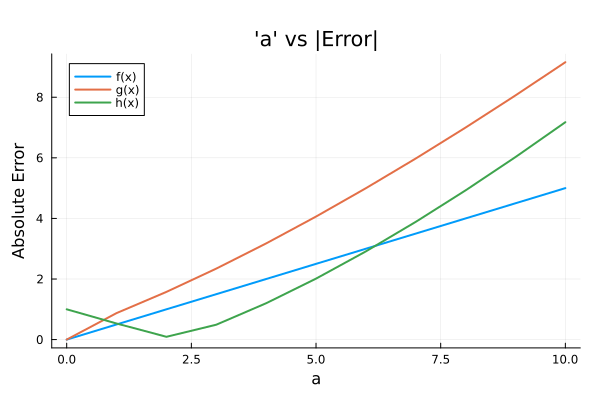

In [13]:
plot(
    a_values,
    [abs_err_f, abs_err_g, abs_err_h],
    linewidth=2,
    title="\n'a' vs |Error|",
    label=["f(x)" "g(x)" "h(x)"],
    xlabel="a",
    ylabel="Absolute Error",
    margin=3 * Plots.mm
)

From this graph we can see that as ***a*** incerases our error also increases. An exception to this when ***a*** goes from 0 to/ ~2 for the function h(x), the error decreases for h(x).

### NOTE: I'm an undergrad so the work below is merely for extra-credit

### 2a)

In [22]:
function optimizer2D(func, starting_x, starting_y, n=2)
    # optimization method used = Coordinate Descent
    # source(s) = custom made
    ep = 1e-3

    x = starting_x
    y = starting_y

    for _ in 1:n
        fx = func(x, y, fixed=:y)
        fy = func(x, y, fixed=:x)
        conv_x, x, iters_x, elapsed_x = optimizer1D(fx, x, a) # optimize x
        conv_y, y, iters_y, elapsed_y = optimizer1D(fy, x, a) # optimize y
        println("(", x, ",", y, ")")
    end

    return x, y
end

optimizer2D (generic function with 2 methods)

### 2b)

For this part I used the Rosenbrock function:
\begin{aligned}
f(x, y) = (a - x)^2 + b \cdot (y - x^2)^2, \quad a, b \in \mathbb{R}
\end{aligned}

more specifically where 

\begin{aligned}
a = 1 \text{ and } b = 100
\end{aligned}


The code below was generated by ChatGPT. It allows me to get the rosenbrock function fixed at a specific variable.

In [15]:
function rosenbrock(x, y; fixed::Symbol=:x)
    if fixed == :x
        function fy(z)
            return (1 - x)^2 + 100 * (z - x^2)^2
        end
        return fy
    elseif fixed == :y
        function fx(z)
            return (1 - z)^2 + 100 * (y - z^2)^2
        end
        return fx
    end
end

rosenbrock (generic function with 1 method)

In [23]:
optimizer2D(rosenbrock, 2, 2)

(0.1713607705859025,1.0000008762242498)
(5.052100552809473e-7,0.6866441612073104)


(5.052100552809473e-7, 0.6866441612073104)